In [13]:
import IPython
import os
os.system("ls [a-z]*.md | grep -v 'ports\.md' |grep -v audris |grep -v cukaegbu| sed 's/\.md$//'| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

# Create labels for the graph
flab = files

['abanks19', 'ahende39', 'ahughe51', 'amalviya', 'astjohn1', 'asuther8', 'avo5', 'azou', 'bgreenb3', 'bmingled', 'bperosa', 'ciadonis', 'dlomax', 'dmaioran', 'dschult9', 'dtroutm1', 'fxie6', 'fxu11', 'gbrown39', 'hkitts2', 'jcarmac3', 'jhamil53', 'jhammer3', 'jhills', 'jlemon3', 'jmatloc1', 'jmoczadl', 'jmuncy2', 'jnotowic', 'kcavitt', 'kleland', 'klim7', 'kpatel87', 'lgonzal6', 'mdixson2', 'mjahansh', 'mmohandi', 'mmuszik1', 'moliaee2', 'mrm634', 'mxw557', 'plin5', 'ppatel91', 'psherri1', 'pvelas', 'rbarklow', 'rbhupati', 'rbray2', 'reehsemm', 'rrusitan', 'rstewa35', 'rwill148', 'showel17', 'shwang6', 'spatel91', 'sxue3', 'tainley', 'tflorey', 'tnguye85', 'vaiely', 'wcoar', 'wjohns53', 'wsquires', 'xcao14', 'yli53']


In [14]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  line = a.read()
  documents .append(line)
  text = text + " " + line
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [15]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,abanks19,ahende39,ahughe51,amalviya,astjohn1,asuther8,avo5,azou,bgreenb3,bmingled,...,sxue3,tainley,tflorey,tnguye85,vaiely,wcoar,wjohns53,wsquires,xcao14,yli53
abanks19,1.000,0.099,0.084,0.080,0.056,0.075,0.088,0.125,0.068,0.102,...,0.165,0.131,0.130,0.086,0.137,0.092,0.126,0.060,0.088,0.085
ahende39,0.099,1.000,0.134,0.078,0.076,0.086,0.085,0.200,0.114,0.103,...,0.154,0.133,0.111,0.089,0.153,0.160,0.157,0.042,0.133,0.114
ahughe51,0.084,0.134,1.000,0.048,0.064,0.151,0.083,0.143,0.087,0.136,...,0.116,0.051,0.062,0.057,0.124,0.155,0.070,0.090,0.083,0.116
amalviya,0.080,0.078,0.048,1.000,0.069,0.103,0.216,0.063,0.150,0.167,...,0.156,0.036,0.076,0.085,0.095,0.084,0.117,0.084,0.158,0.100
astjohn1,0.056,0.076,0.064,0.069,1.000,0.067,0.063,0.079,0.105,0.047,...,0.125,0.096,0.082,0.069,0.067,0.121,0.076,0.051,0.180,0.189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wcoar,0.092,0.160,0.155,0.084,0.121,0.120,0.065,0.129,0.099,0.100,...,0.100,0.087,0.088,0.065,0.123,1.000,0.075,0.068,0.090,0.116
wjohns53,0.126,0.157,0.070,0.117,0.076,0.099,0.155,0.117,0.138,0.134,...,0.189,0.140,0.123,0.191,0.142,0.075,1.000,0.065,0.124,0.157
wsquires,0.060,0.042,0.090,0.084,0.051,0.110,0.068,0.052,0.069,0.094,...,0.126,0.060,0.030,0.034,0.055,0.068,0.065,1.000,0.075,0.041
xcao14,0.088,0.133,0.083,0.158,0.180,0.132,0.175,0.198,0.182,0.128,...,0.151,0.122,0.229,0.059,0.107,0.090,0.124,0.075,1.000,0.172


0.6510830604398075
plin5 lgonzal6 rstewa35 kpatel87 ppatel91 sxue3 
rrusitan xcao14 tflorey jmoczadl dmaioran mrm634 
mmuszik1 jhamil53 bperosa yli53 rwill148 jmatloc1 
rbray2 ahende39 wcoar ciadonis reehsemm bgreenb3 
psherri1 kcavitt tnguye85 jnotowic gbrown39 abanks19 
fxie6 azou shwang6 rbarklow vaiely rbhupati 
tainley dtroutm1 bmingled wjohns53 mdixson2 jhills 
hkitts2 asuther8 kleland wsquires jhammer3 dlomax 
mjahansh dschult9 spatel91 jmuncy2 ahughe51 pvelas 
showel17 mmohandi jlemon3 amalviya 


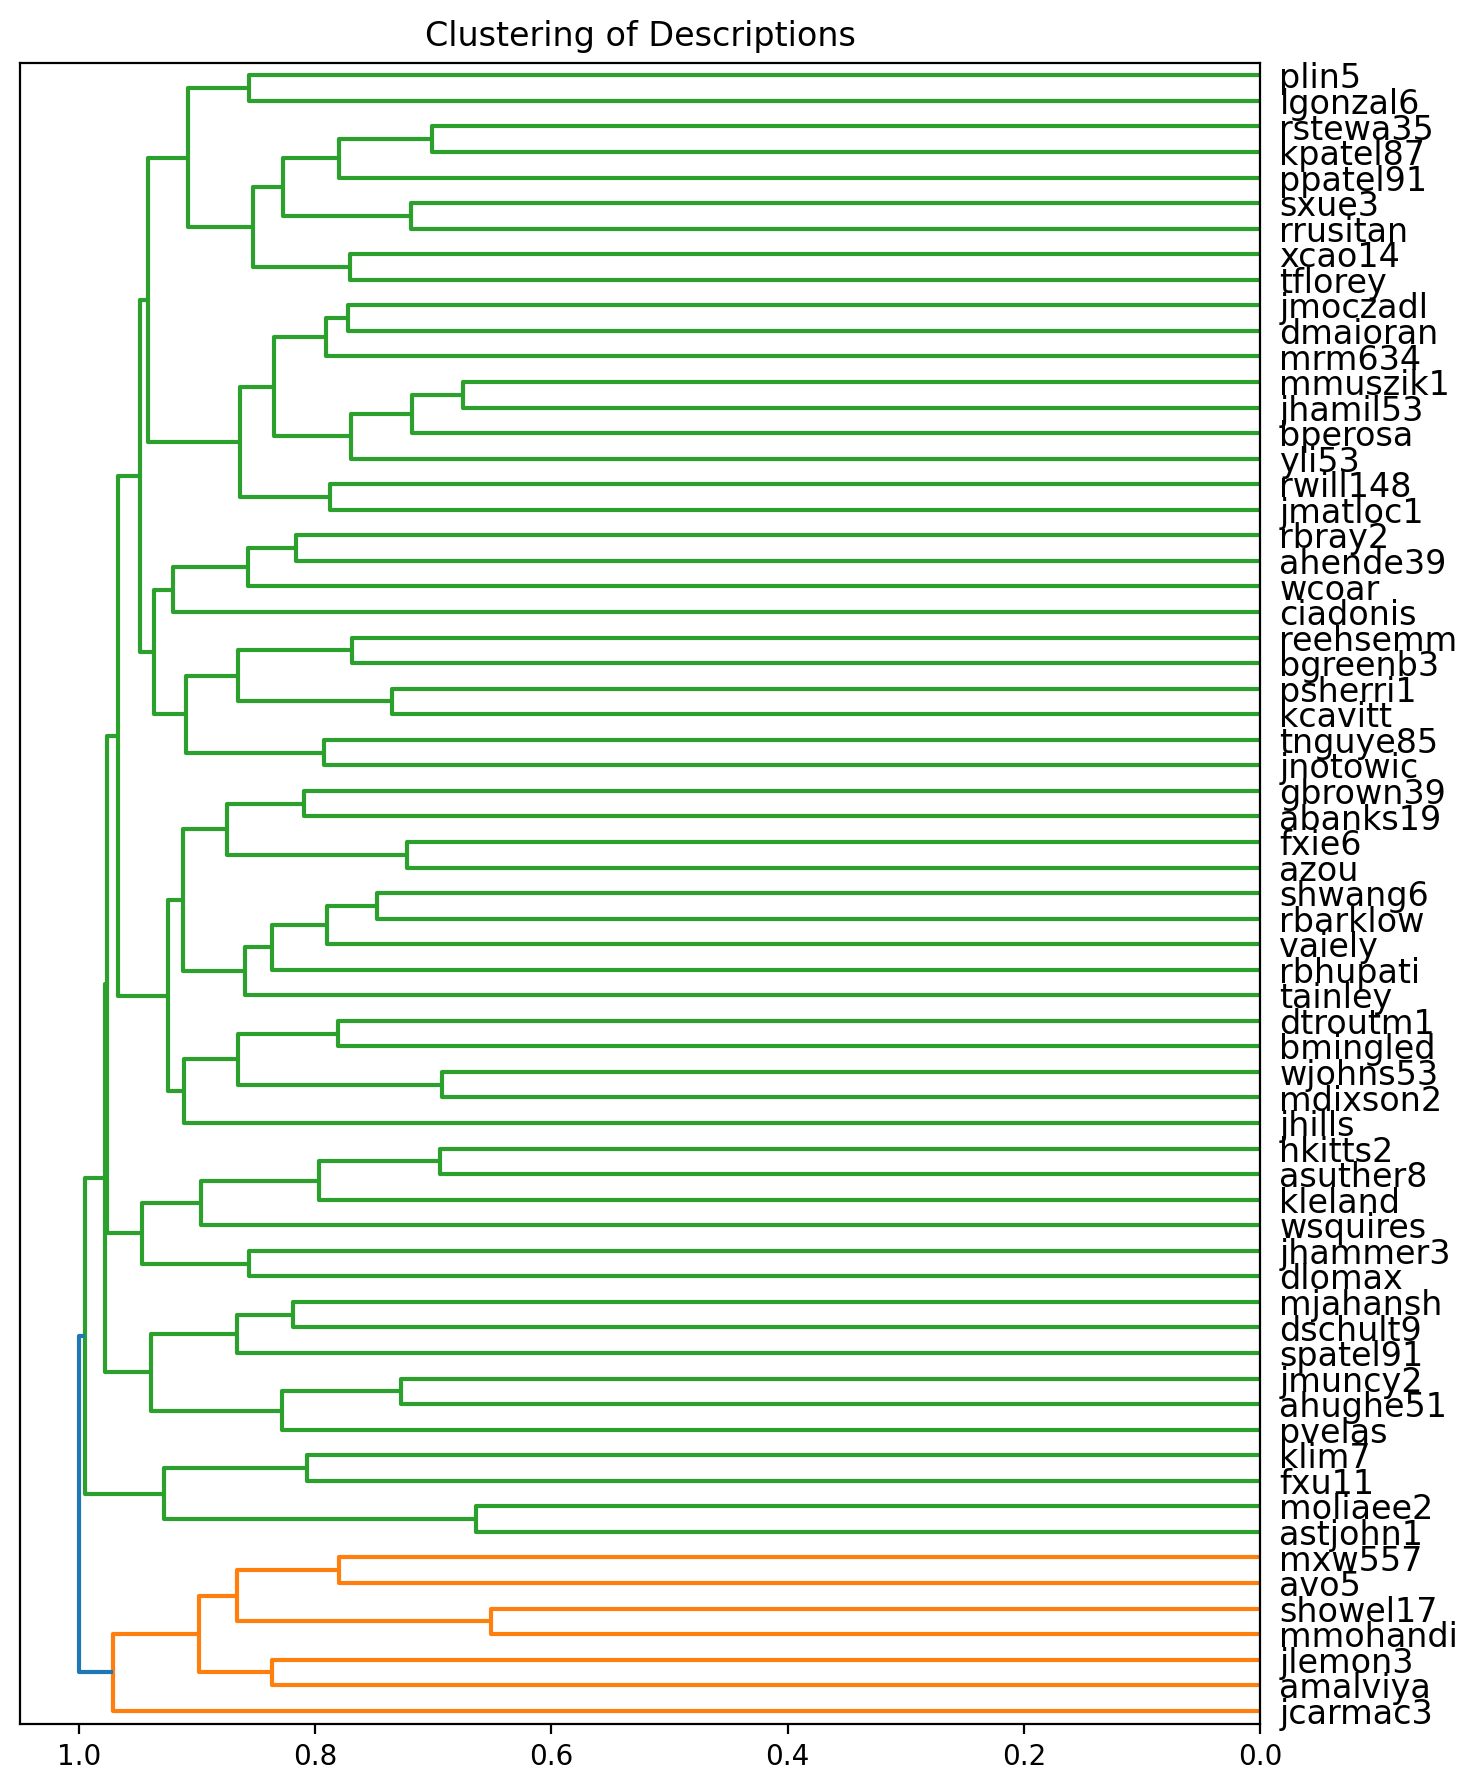

In [17]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math, sys
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

# Calculate cosine distance (clustering needs distance, not similarity)   
#dist ij = dist2 [i*(n-1)+j] and i < j
dist1 = pdist(tfidf.A, 'cosine')
minVal = min(dist1)
print(minVal)
d1 = len(files)-1
ij = np.where(dist1==minVal)[0][0]
for i in range(0,d1):
    for j in range (i+1,d1):
        ij -= 1
        if ij == 0: 
            break
    else:        
        continue  
    break



# Do clustering
linkage_matrix = linkage (dist1, method='complete')
#print(linkage_matrix)

# Plot results
fig = plt.figure(1, figsize=(8, 11),dpi=200)
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,leaf_font_size =12
               )
for j in range (9):
  for i in range (6):
     sys.stdout.write(flab[ddata['leaves'][d1-j*6-i]]+' ')
  sys.stdout.write('\n')
for i in range (d1-10*6):
  sys.stdout.write(flab[ddata['leaves'][d1-10*6-i]]+' ')
sys.stdout.write('\n')        

plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")

# Investigate interactive graph

In [75]:

import networkx as nx
import json

# use these distances to create a graph by cutting links below .30 
nxg = nx.Graph()
for i in range(len(files)-1):
    nxg.add_node(i, label=flab[i], tooltip=flab[i])
for i in range(len(files)-1):    
    nLinks = 0
    maxVal = 0
    jMax = 0
    for j in range(i+1,len(files)):        
        if df.iloc[i,j] > maxVal: 
            maxVal = df.iloc[i,j]
            if i != j: jMax = j
        if (df.iloc[i,j] > .25):
            nLinks += 1
            nxg.add_edge(i, j, weight=math.sqrt(df.iloc[i,j]*150+1),color='yellow')
    if nLinks == 0:
        nxg.add_edge(i, jMax, weight=10,color='red')
        
print (nxg.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


In [76]:
import ipycytoscape
import json

undir = ipycytoscape.CytoscapeWidget()
undir.graph.add_graph_from_networkx(nxg)
undir.set_style([ 
                    {
                        'selector': 'node',
                        'css': {
                            'content': 'data(label)',
                            'text-valign': 'center',
                            'color': 'black',
                            'text-size': 40,
                            'text-outline-width': 0,
                            'text-outline-color': 'green',
                            'background-color': 'yellow'
                        }
                    },
    
                    {   'selector': 'node',
                        'style': {
                          'font-size':'40px',
                          'label': 'data(label)'
                        }
                    }, 
                   { 'selector': 'edge',
                        'style': {
                            'width': 'data(weight)'
                        }
                   }

])
undir.set_layout(name='cola',nodespacing=2,animate=True)
undir.set_tooltip_source('tooltip')
display(undir)



CytoscapeWidget(cytoscape_layout={'name': 'cola', 'nodespacing': 2, 'animate': True}, cytoscape_style=[{'selec…